# Customer Churn Prediction Kaggle 2020

In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train.shape

(4250, 20)

In [3]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
test.shape

(750, 20)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [6]:
train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [7]:
test.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [8]:
test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [9]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [10]:
test.tail()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1
749,750,DC,109,area_code_510,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0


In [11]:
test.drop('id', axis = 1, inplace = True)

In [12]:
test.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [13]:
train_cat = train.select_dtypes(exclude=['number', 'bool_', 'float_'])

In [14]:
train_cat.head()

,state,area_code,international_plan,voice_mail_plan,churn
0,OH,area_code_415,no,yes,no
1,NJ,area_code_415,no,no,no
2,OH,area_code_408,yes,no,no
3,OK,area_code_415,yes,no,no
4,MA,area_code_510,no,yes,no


In [15]:
train_num = train.select_dtypes(exclude=['bool_', 'object_'])

In [16]:
train_num.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3


In [17]:
corr_abs = train.corr().abs()

sol = (corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))
                                
                       .stack()
                       .sort_values(ascending = False))
sol

total_day_minutes    total_day_charge      1.000000
total_eve_minutes    total_eve_charge      1.000000
total_night_minutes  total_night_charge    0.999999
total_intl_minutes   total_intl_charge     0.999993
total_night_minutes  total_intl_calls      0.024280
                                             ...   
total_day_minutes    total_day_calls       0.000747
total_night_minutes  total_intl_minutes    0.000113
total_night_charge   total_intl_minutes    0.000103
total_night_minutes  total_intl_charge     0.000047
total_night_charge   total_intl_charge     0.000037
Length: 105, dtype: float64

In [18]:
# now drop the features which has the highest correlation pair

train.drop(['total_day_charge','total_eve_charge','total_night_charge','total_intl_charge'], axis = 1, inplace = True)
test.drop(['total_day_charge','total_eve_charge','total_night_charge','total_intl_charge'],axis = 1, inplace = True)

In [19]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,348.5,108,212.6,118,7.5,7,3,no


In [20]:
test.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls
0,KS,128,area_code_415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,AL,118,area_code_510,yes,no,0,223.4,98,220.6,101,203.9,118,6.3,6,0
2,IA,62,area_code_415,no,no,0,120.7,70,307.2,76,203.0,99,13.1,6,4
3,VT,93,area_code_510,no,no,0,190.7,114,218.2,111,129.6,121,8.1,3,3
4,NE,174,area_code_415,no,no,0,124.3,76,277.1,112,250.7,115,15.5,5,3


array([[<AxesSubplot:title={'center':'account_length'}>,
        <AxesSubplot:title={'center':'number_vmail_messages'}>,
        <AxesSubplot:title={'center':'total_day_minutes'}>],
       [<AxesSubplot:title={'center':'total_day_calls'}>,
        <AxesSubplot:title={'center':'total_eve_minutes'}>,
        <AxesSubplot:title={'center':'total_eve_calls'}>],
       [<AxesSubplot:title={'center':'total_night_minutes'}>,
        <AxesSubplot:title={'center':'total_night_calls'}>,
        <AxesSubplot:title={'center':'total_intl_minutes'}>],
       [<AxesSubplot:title={'center':'total_intl_calls'}>,
        <AxesSubplot:title={'center':'number_customer_service_calls'}>,
        <AxesSubplot:>]], dtype=object)

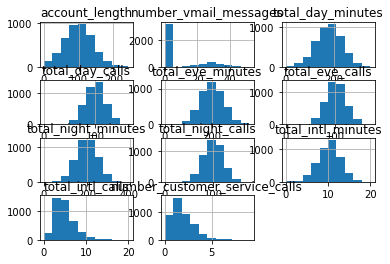

In [21]:
train.hist()

In [22]:
#from the graphs it can be seen that the voice mail and customer service calls are skewed at right, i.e it is densed at left.

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
train.corr()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls
account_length,1.000000,-0.006626,-0.001612,0.023002,-0.010326,0.005535,-0.009916,-0.001846,0.004539,0.013690,0.001002
number_vmail_messages,-0.006626,1.000000,0.002000,-0.006920,0.010725,0.003593,0.018308,0.001977,0.005220,0.006585,-0.015303
total_day_minutes,-0.001612,0.002000,1.000000,0.000747,-0.013248,0.005986,0.010049,-0.004812,-0.021369,0.003859,-0.002925
total_day_calls,0.023002,-0.006920,0.000747,1.000000,0.008661,0.003739,0.002206,-0.004815,0.008834,0.009377,-0.015845
total_eve_minutes,-0.010326,0.010725,-0.013248,0.008661,1.000000,0.003101,-0.014018,0.011973,-0.003509,0.012239,-0.010063
total_eve_calls,0.005535,0.003593,0.005986,0.003739,0.003101,1.000000,0.008425,-0.011929,-0.013096,0.004949,0.006956
total_night_minutes,-0.009916,0.018308,0.010049,0.002206,-0.014018,0.008425,1.000000,0.023815,-0.000113,-0.024280,-0.013771
total_night_calls,-0.001846,0.001977,-0.004812,-0.004815,0.011973,-0.011929,0.023815,1.000000,0.001093,0.003851,-0.008893
total_intl_minutes,0.004539,0.005220,-0.021369,0.008834,-0.003509,-0.013096,-0.000113,0.001093,1.000000,0.019328,-0.013994
total_intl_calls,0.013690,0.006585,0.003859,0.009377,0.012239,0.004949,-0.024280,0.003851,0.019328,1.000000,-0.015302


In [25]:
#lets check how many percentage of people have churned.

is_churn = train['churn']=='yes'
y_true = train.churn[is_churn]

print("Percentage of people churned = " +str((y_true.shape[0]/train["churn"].shape[0]) * 100))

Percentage of people churned = 14.070588235294117


In [26]:
# since the people who have churned are less, the ML model would be biased. In order to avoid that we have to make a ML model not biased.
#lets convert the categorical data into numerical.

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

train['state'] = label_encoder.fit_transform(train['state'])
train['international_plan'] = label_encoder.fit_transform(train['international_plan'])
train['voice_mail_plan'] = label_encoder.fit_transform(train['voice_mail_plan'])
train['area_code'] = label_encoder.fit_transform(train['area_code'])

print(train.dtypes)

state                              int32
account_length                     int64
area_code                          int32
international_plan                 int32
voice_mail_plan                    int32
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_eve_minutes                float64
total_eve_calls                    int64
total_night_minutes              float64
total_night_calls                  int64
total_intl_minutes               float64
total_intl_calls                   int64
number_customer_service_calls      int64
churn                             object
dtype: object


In [27]:
train.shape

(4250, 16)

In [28]:
y = train['churn']
y.size

4250

In [29]:
y = y.replace({'no': 0, 'yes' : 1})

In [30]:
#features for the ML model

X= train.loc[:, train.columns != 'churn']
X.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls
0,35,107,1,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1
1,31,137,1,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0
2,35,84,0,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2
3,36,75,1,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3
4,19,121,2,0,1,24,218.2,88,348.5,108,212.6,118,7.5,7,3


In [31]:
X.shape

(4250, 15)

In [32]:
#standardizing the data: this is done so the data is in more digestable form for the algorithms.

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.60308081,  0.17039882,  0.00994348, ...,  1.24790134,
        -0.57916393, -0.42634613],
       [ 0.33221228,  0.92618569,  0.00994348, ...,  0.70437917,
         0.2329267 , -1.1889602 ],
       [ 0.60308081, -0.40903778, -1.39871658, ..., -1.3247703 ,
         1.04501732,  0.33626795],
       ...,
       [ 0.06134376, -0.63577385, -1.39871658, ..., -1.21606586,
         1.04501732, -0.42634613],
       [-1.02213036, -1.26559624, -1.39871658, ..., -0.12902151,
         0.2329267 ,  0.33626795],
       [ 1.34796927, -0.35865199,  0.00994348, ..., -0.34643038,
         4.69942514, -1.1889602 ]])

In [33]:
#Since our dataset for the output variable is skewed(imbalnced class)
#To handle this: Usage of stratified Kfold (It tries to take equal proportion of both yes and no)

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=10, random_state = 42)

#implemenation of Gradient Boost Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state = 42)

for train_index, test_index in skfolds.split(X, y) :
    clone_clf = clone(gb_clf)
    X_train_folds = X[train_index]
    y_train_folds = (y[train_index])
    X_test_fold = X[test_index]
    y_test_fold = (y[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("Results for Gradient Boost Classifier", n_correct / len(y_pred))

C:\Users\rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Results for Gradient Boost Classifier 0.9552941176470588
Results for Gradient Boost Classifier 0.9435294117647058
Results for Gradient Boost Classifier 0.9529411764705882
Results for Gradient Boost Classifier 0.9576470588235294
Results for Gradient Boost Classifier 0.9576470588235294
Results for Gradient Boost Classifier 0.9576470588235294
Results for Gradient Boost Classifier 0.9552941176470588
Results for Gradient Boost Classifier 0.9411764705882353
Results for Gradient Boost Classifier 0.9505882352941176
Results for Gradient Boost Classifier 0.9764705882352941
